In [2]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from matplotlib import pyplot as plt

In [6]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
type_im = ["1+","1+","2+","2+","2+", "3+"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_images = len(images)
images_dir = [None] * n_images
classifiers=["rf_0_cross"]
percentages = ["10", "0.20", "0.30", "0.40", "0.50"]

## Without undersampling

In [9]:
n_seeds = 10
n_im = len(images)
n_class = len(classifiers)
n_perc = len(percentages)
f1 = np.zeros((n_im,n_seeds,n_perc))
prec = np.zeros((n_im,n_seeds,n_perc))
rec = np.zeros((n_im,n_seeds,n_perc))


for c,clf in enumerate(classifiers):
    print("classifier:", clf)     
    for p,perc in enumerate(percentages):
        print("perc:", perc)
        for i in range(n_im):
            path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_stratified_random_"+perc+"/"
            #f = os.listdir(path)
            #print(f)
            big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
            big_y0=np.load(big_target_path)
            for j in range(n_seeds):

                big_pred = np.load(path + clf + '/big_pred/' + str(j) + '_big_pred.npy')
                f1[i,j,p] = f1_score(big_y0,big_pred)
                prec[i,j,p] = precision_score(big_y0,big_pred)
                rec[i,j,p] = recall_score(big_y0,big_pred)
                #print(classification_report(big_y0,big_pred))


classifier: rf_0_cross
perc: 10
perc: 0.20
perc: 0.30
perc: 0.40
perc: 0.50


[ 0.45644424  0.39309961  0.34127444  0.30339064  0.27017423]


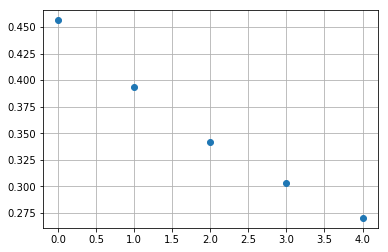

In [12]:
means = np.zeros((len(percentages)))
for p in range(len(percentages)):
    means[p] = f1[:,:,p].mean()
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()

## With Undersampling

In [19]:
classifiers=["rf_1_cross"]
percentages = ["", "10", "0.20", "0.30", "0.40", "0.50"]
n_seeds = 10
n_im = len(images)
n_class = len(classifiers)
n_perc = len(percentages)
f1 = np.zeros((n_im,n_seeds,n_perc))
prec = np.zeros((n_im,n_seeds,n_perc))
rec = np.zeros((n_im,n_seeds,n_perc))
print(f1.shape)



(6, 10, 5)


In [20]:
for c,clf in enumerate(classifiers):
    print("classifier:", clf)     
    for p,perc in enumerate(percentages):
        print("perc:", perc)
        for i in range(n_im):
            path = "/home/rpezoa/experiment_data/output/" + images[i]+ "_rpr_stratified_random_"+perc+"/"
            #f = os.listdir(path)
            #print(f)
            big_target_path="/home/rpezoa/experiment_data/big_" + type_im[i] + "/labels/" + images[i] + ".npy"
            big_y0=np.load(big_target_path)
            for j in range(n_seeds):

                big_pred = np.load(path + clf + '/big_pred/' + str(j) + '_big_pred.npy')
                f1[i,j,p] = f1_score(big_y0,big_pred)
                prec[i,j,p] = precision_score(big_y0,big_pred)
                rec[i,j,p] = recall_score(big_y0,big_pred)
                #print(classification_report(big_y0,big_pred))

classifier: rf_1_cross
perc: 10
perc: 0.20
perc: 0.30
perc: 0.40
perc: 0.50


[ 0.26711008  0.2609559   0.26235096  0.26500015  0.26713366]


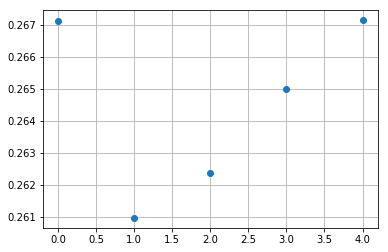

In [21]:
means = np.zeros((len(percentages)))
for p in range(len(percentages)):
    means[p] = f1[:,:,p].mean()
    
print(means)
plt.figure()
plt.plot(means,'o')
plt.grid()
plt.show()